In [116]:
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
from datetime import datetime

In [2]:
trip = pd.read_csv('/Users/Robert/Documents/OrganizacionDeDatos/data/trip.csv')

In [12]:
trip.sample(3)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
67017,93362,315,11/12/2013 16:02,Powell at Post (Union Square),71,11/12/2013 16:07,Washington at Kearney,46,453,Subscriber,94109
99792,138404,3556,12/30/2013 14:10,Harry Bridges Plaza (Ferry Building),50,12/30/2013 15:10,Harry Bridges Plaza (Ferry Building),50,277,Customer,90026
455075,730723,776,4/17/2015 17:56,Temporary Transbay Terminal (Howard at Beale),55,4/17/2015 18:09,Townsend at 7th,65,606,Subscriber,94107


In [22]:
trip.sample(2)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,date,hour
663939,441179,6485,9/6/2014 16:24,Embarcadero at Sansome,60,9/6/2014 18:12,Embarcadero at Sansome,60,419,Customer,78722,9/6/2014,16:24
281854,245159,309,4/11/2014 14:59,Grant Avenue at Columbus Avenue,73,4/11/2014 15:04,Clay at Battery,41,352,Subscriber,94107,4/11/2014,14:59


In [42]:
trip.shape

(669959, 13)

In [55]:
del trip['annual_member'] 

In [56]:
trip['subscription_type'].value_counts()

Subscriber    566746
Customer      103213
Name: subscription_type, dtype: int64

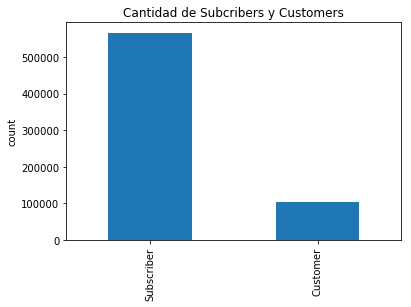

In [3]:
trip['subscription_type'].value_counts().plot.bar(title = "Cantidad de Subcribers y Customers")
plt.ylabel('count')
   

In [39]:
date = trip.loc[:,'start_date'].str.split(' ')
trip['date'] = date.map(lambda date: date[0])
trip['hour'] = date.map(lambda hour: hour[1])
trip['hour'] = trip.loc[:,'hour'].str.split(':').map(lambda h: h[0])


In [52]:
trip.loc[(trip.duration > 7200)]

736       15
737       15
738       13
739       12
740       11
741       11
742       11
743       15
744       13
745       13
746       21
747       13
1410      19
1411      19
1412      19
1413      13
1414      13
1415       9
1416      17
1417      17
1418      16
1419      12
1420      16
1421      12
1422      15
1423      18
1424       7
1425      12
1426      16
1427      19
          ..
669702    15
669703    15
669705    15
669706    15
669737    14
669758    14
669762    14
669765    14
669767    13
669770    13
669771    13
669772    13
669784    13
669786    13
669788    13
669789    13
669792    13
669802    13
669830    12
669833    12
669858    12
669861    12
669862    12
669880    11
669930     9
669931     9
669935     8
669936     8
669947     7
669948     7
Name: hour, dtype: object

In [43]:
trip.shape

(669959, 13)

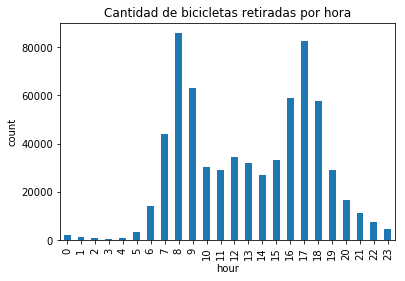

In [36]:
# Cantidad de bicicletas retiradas por hora
trip.sort_values(by=('hour'), ascending=True)['hour']\
    .map(lambda x :int(x)).value_counts().sort_index().plot.bar(title="Cantidad de bicicletas retiradas por hora")
plt.ylabel('count')
plt.xlabel('hour')


In [30]:
trip['hour'] = trip.hour.map(lambda x: int(x))
trip.hour

0         14
1         14
2         10
3         11
4         12
5         18
6         13
7         14
8         17
9         11
10        13
11        13
12        19
13        13
14        12
15        16
16        11
17        12
18        22
19        22
20        19
21        12
22        11
23        22
24        10
25        13
26        13
27        13
28        21
29        18
          ..
669929     9
669930     9
669931     9
669932     9
669933     9
669934     8
669935     8
669936     8
669937     8
669938     8
669939     8
669940     8
669941     8
669942     8
669943     8
669944     8
669945     8
669946     8
669947     7
669948     7
669949     7
669950     7
669951     6
669952     5
669953     4
669954     4
669955     3
669956     0
669957     0
669958     0
Name: hour, dtype: int64

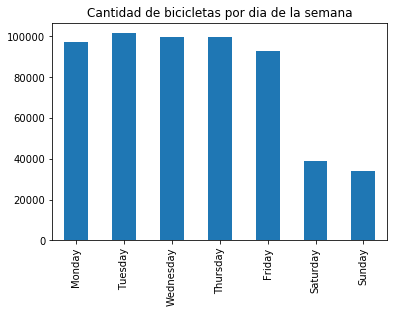

In [31]:
# Cantidad de bicicletas por dia de la semana
import calendar
trip = trip.loc[(trip.hour > 7) & (trip.hour < 20)]
trip['start_date'] = pd.to_datetime(trip['start_date'])
trip['weekday'] = trip['start_date'].dt.dayofweek
trip['weekday'].value_counts().sort_index().rename(lambda x: calendar.day_name[x])\
                .plot.bar(title = "Cantidad de bicicletas por dia de la semana")

In [32]:
trip.hour.value_counts()

8     85864
17    82705
9     62897
16    59099
18    57652
12    34384
15    33223
13    31740
10    30106
19    29188
11    29141
14    27156
Name: hour, dtype: int64

In [113]:
#Convert to datetime so that it can be manipulated more easily
trip['date'] = pd.to_datetime(trip['start_date']).dt.date
trip['date'].value_counts()


2014-09-15    1516
2014-08-26    1513
2014-10-14    1496
2014-10-29    1496
2014-08-27    1479
2015-08-26    1465
2014-10-16    1462
2014-10-02    1452
2015-07-28    1451
2015-08-27    1443
2014-09-16    1438
2015-06-11    1437
2014-09-17    1429
2014-10-24    1427
2015-08-25    1421
2014-10-28    1419
2015-08-17    1418
2015-06-04    1414
2015-07-29    1411
2014-10-30    1411
2014-11-06    1410
2014-10-21    1410
2015-03-25    1409
2015-06-16    1409
2015-08-18    1407
2015-07-08    1405
2014-09-03    1404
2015-03-30    1403
2015-08-13    1401
2015-08-12    1400
              ... 
2015-03-22     280
2013-12-07     277
2014-11-28     277
2015-01-18     275
2013-12-08     274
2013-11-28     272
2015-06-14     269
2014-11-16     267
2015-05-10     267
2015-05-31     266
2014-12-14     264
2015-01-25     259
2015-02-01     251
2014-01-11     247
2014-12-21     246
2014-11-23     235
2014-12-27     231
2015-04-05     216
2014-03-02     208
2015-01-04     206
2015-01-01     181
2014-12-25  

In [112]:
type(trip.date[1])

datetime.date

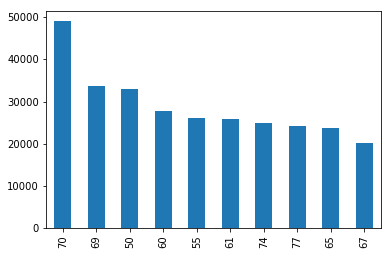

In [145]:
# 10 Estaciones donde se retiran mas bicicletas
trip.start_station_id.value_counts().sort_values(ascending = False)\
    .nlargest(10).plot.bar()


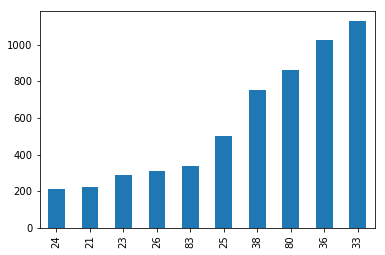

In [147]:
# 10 Estaciones donde se retiran menos bicicletas
trip.start_station_id.value_counts().sort_values(ascending = True)\
    .nsmallest(10).plot.bar()

In [92]:
# Cantidad de viajes que superaron los 30 minutos.
trip['duration'] = trip['duration'].map(lambda x: int(x)/60)
no_exceeded_30min = trip.sort_values(by = 'duration', ascending = False).loc[trip.duration < 1801].shape 
exceeded_30min = tuple(map(lambda x, y: x - y, trip.shape,no_exceeded_30min))

print 'De: '+ str(trip.shape[0]) + ' viajes solo se pasan de 30 minutos: ' + str(exceeded_30min[0])
# Segun lo revisado en http://www.bayareabikeshare.com/pricing
# Se cobra un adicional si se superan los 30 minutos de uso.
# Se ve claramente que hay pocos registros de viajes que superen este límite.

De: 669959 viajes solo se pasan de 30 minutos: 204


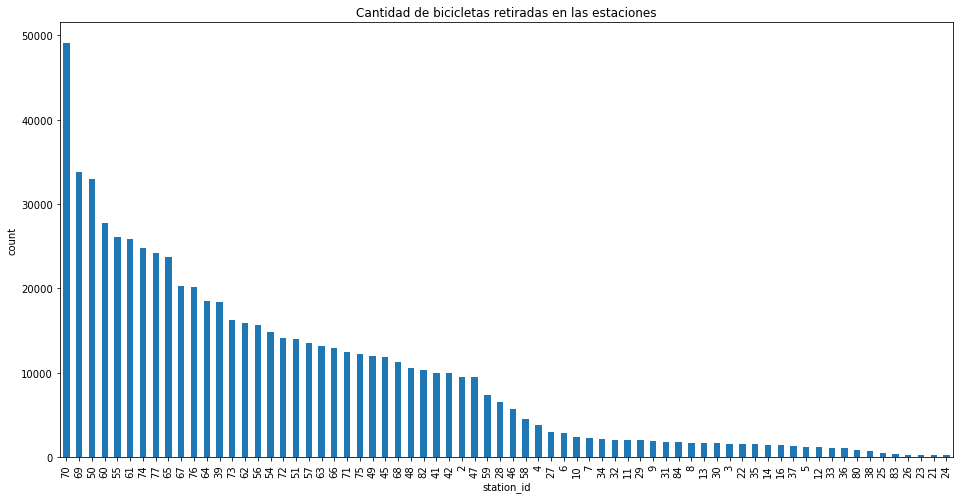

In [95]:
# Estaciones donde se retiran bicicletas
plt.figure()
trip.start_station_id.value_counts().sort_values(ascending = False)\
    .plot.bar(figsize = (16,8), title = "Cantidad de bicicletas retiradas en las estaciones")
plt.xlabel('station_id')
plt.ylabel('count')
   


In [4]:
weather = pd.read_csv('/Users/Robert/Documents/OrganizacionDeDatos/data/weather.csv')

In [5]:
weather.columns

Index([u'date', u'max_temperature_f', u'mean_temperature_f',
       u'min_temperature_f', u'max_dew_point_f', u'mean_dew_point_f',
       u'min_dew_point_f', u'max_humidity', u'mean_humidity', u'min_humidity',
       u'max_sea_level_pressure_inches', u'mean_sea_level_pressure_inches',
       u'min_sea_level_pressure_inches', u'max_visibility_miles',
       u'mean_visibility_miles', u'min_visibility_miles',
       u'max_wind_Speed_mph', u'mean_wind_speed_mph', u'max_gust_speed_mph',
       u'precipitation_inches', u'cloud_cover', u'events', u'wind_dir_degrees',
       u'zip_code'],
      dtype='object')

In [6]:
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107


In [7]:
weather.zip_code.unique()

array([94107, 94063, 94301, 94041, 95113])

In [10]:
trip.sample()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
485932,689066,287,3/19/2015 10:45,2nd at South Park,64,3/19/2015 10:50,Howard at 2nd,63,434,Subscriber,94107


In [20]:
station = pd.read_csv('/Users/Robert/Documents/OrganizacionDeDatos/data/station.csv')

In [21]:
weather = pd.read_csv('/Users/Robert/Documents/OrganizacionDeDatos/data/weather.csv')

In [14]:
station.columns

Index([u'id', u'name', u'lat', u'long', u'dock_count', u'city',
       u'installation_date'],
      dtype='object')

In [15]:
station.sample()

,id,name,lat,long,dock_count,city,installation_date
19,26,Redwood City Medical Center,37.487682,-122.223492,15,Redwood City,8/12/2013


In [17]:
trip.merge(right=station, b)
trip_weather = pd.merge(trip, weather, on='', how='outer')

94107       78704
94105       42672
94133       31359
94103       26673
94111       21409
94102       19757
94109       13989
95112       11564
nil         10682
94117        9851
94158        9180
94611        8026
94110        7621
94403        7168
94108        7149
94040        7114
94602        6816
94114        6707
94025        6439
94501        6419
94610        6301
95110        6054
94010        6039
94041        5867
94404        5323
94070        5229
95113        4811
94122        4802
94608        4714
94402        4633
            ...  
11901           1
7311            1
80022           1
30519           1
75246           1
56063           1
32118           1
74115           1
857066          1
13995000        1
40391           1
18036           1
44145           1
44141           1
72761           1
4306            1
9051            1
9588            1
9581            1
97351           1
24937           1
55987           1
55455           1
61114           1
1904      

In [22]:
weather.columns

Index([u'date', u'max_temperature_f', u'mean_temperature_f',
       u'min_temperature_f', u'max_dew_point_f', u'mean_dew_point_f',
       u'min_dew_point_f', u'max_humidity', u'mean_humidity', u'min_humidity',
       u'max_sea_level_pressure_inches', u'mean_sea_level_pressure_inches',
       u'min_sea_level_pressure_inches', u'max_visibility_miles',
       u'mean_visibility_miles', u'min_visibility_miles',
       u'max_wind_Speed_mph', u'mean_wind_speed_mph', u'max_gust_speed_mph',
       u'precipitation_inches', u'cloud_cover', u'events', u'wind_dir_degrees',
       u'zip_code'],
      dtype='object')

In [27]:
weather.mean_temperature_f.value_counts()


60.0    276
68.0    234
58.0    220
62.0    196
70.0    193
56.0    180
66.0    176
57.0    159
65.0    146
55.0    137
64.0    136
63.0    136
54.0    134
67.0    132
59.0    131
61.0    126
69.0    123
52.0    107
53.0     97
71.0     94
50.0     73
72.0     73
51.0     45
74.0     43
48.0     37
73.0     32
49.0     31
47.0     27
76.0     26
75.0     24
46.0     17
45.0     14
44.0     13
42.0     12
77.0     11
43.0     10
78.0     10
41.0      8
38.0      6
80.0      5
82.0      3
40.0      2
39.0      2
79.0      2
84.0      1
81.0      1
Name: mean_temperature_f, dtype: int64

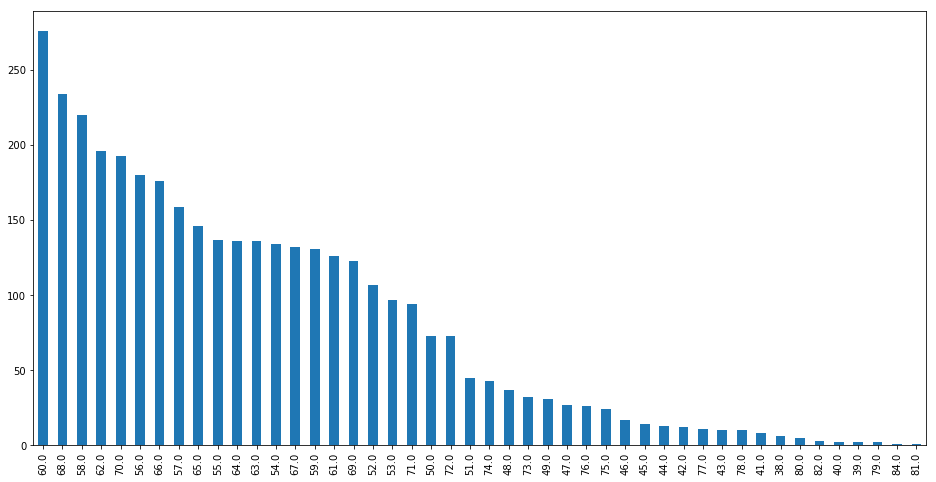

In [26]:
weather.mean_temperature_f.value_counts().plot.bar(figsize = (16,8))

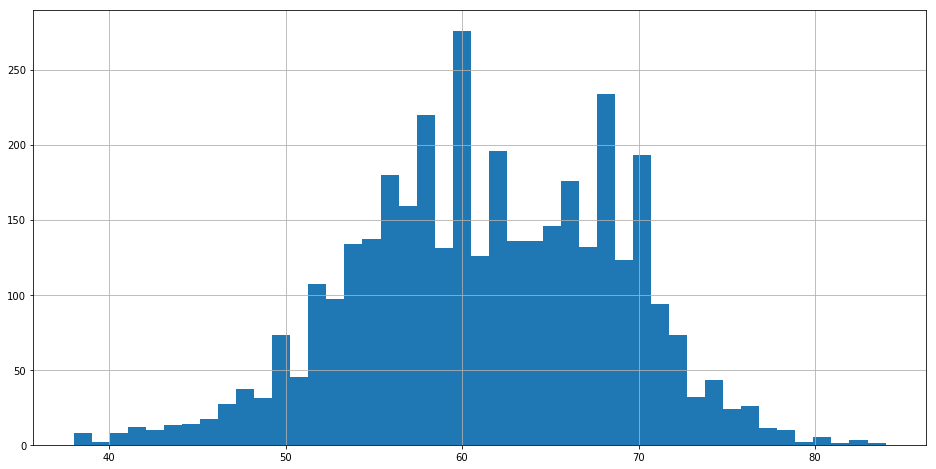

In [34]:
weather.mean_temperature_f.hist(bins = 45, figsize = (16,8))

In [68]:
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107


In [69]:
for name in weather:
    print name

date
max_temperature_f
mean_temperature_f
min_temperature_f
max_dew_point_f
mean_dew_point_f
min_dew_point_f
max_humidity
mean_humidity
min_humidity
max_sea_level_pressure_inches
mean_sea_level_pressure_inches
min_sea_level_pressure_inches
max_visibility_miles
mean_visibility_miles
min_visibility_miles
max_wind_Speed_mph
mean_wind_speed_mph
max_gust_speed_mph
precipitation_inches
cloud_cover
events
wind_dir_degrees
zip_code


In [99]:
import gmplot


In [122]:
help( gmap.write_grids)


Help on method write_grids in module gmplot.gmplot:

write_grids(self, f) method of gmplot.gmplot.GoogleMapPlotter instance



In [91]:
station['city'].value_counts()

San Francisco    35
San Jose         16
Redwood City      7
Mountain View     7
Palo Alto         5
Name: city, dtype: int64

In [47]:
station = pd.read_csv('/Users/Robert/Documents/OrganizacionDeDatos/data/station.csv')

In [48]:
station

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013
5,7,Paseo de San Antonio,37.333798,-121.886943,15,San Jose,8/7/2013
6,8,San Salvador at 1st,37.330165,-121.885831,15,San Jose,8/5/2013
7,9,Japantown,37.348742,-121.894715,15,San Jose,8/5/2013
8,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013
9,11,MLK Library,37.335885,-121.885660,19,San Jose,8/6/2013


In [49]:
station_in_san_francisco = station.loc[(station.city == 'San Francisco')]

In [50]:
station_in_san_francisco

,id,name,lat,long,dock_count,city,installation_date
32,41,Clay at Battery,37.795001,-122.399970,15,San Francisco,8/19/2013
33,42,Davis at Jackson,37.797280,-122.398436,15,San Francisco,8/19/2013
34,45,Commercial at Montgomery,37.794231,-122.402923,15,San Francisco,8/19/2013
35,46,Washington at Kearney,37.795425,-122.404767,15,San Francisco,8/19/2013
36,47,Post at Kearney,37.788975,-122.403452,19,San Francisco,8/19/2013
37,48,Embarcadero at Vallejo,37.799953,-122.398525,15,San Francisco,8/19/2013
38,49,Spear at Folsom,37.790302,-122.390637,19,San Francisco,8/20/2013
39,50,Harry Bridges Plaza (Ferry Building),37.795392,-122.394203,23,San Francisco,8/20/2013
40,51,Embarcadero at Folsom,37.791464,-122.391034,19,San Francisco,8/20/2013
41,39,Powell Street BART,37.783871,-122.408433,19,San Francisco,8/25/2013


In [51]:
station_in_san_francisco = station_in_san_francisco.loc[:,('id', 'name', 'lat','long')]

In [52]:
station_in_san_francisco

,id,name,lat,long
32,41,Clay at Battery,37.795001,-122.399970
33,42,Davis at Jackson,37.797280,-122.398436
34,45,Commercial at Montgomery,37.794231,-122.402923
35,46,Washington at Kearney,37.795425,-122.404767
36,47,Post at Kearney,37.788975,-122.403452
37,48,Embarcadero at Vallejo,37.799953,-122.398525
38,49,Spear at Folsom,37.790302,-122.390637
39,50,Harry Bridges Plaza (Ferry Building),37.795392,-122.394203
40,51,Embarcadero at Folsom,37.791464,-122.391034
41,39,Powell Street BART,37.783871,-122.408433


In [53]:
trip_station =  pd.merge(trip, station_in_san_francisco, how='inner',  left_on='start_station_id', right_on='id', left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False)


In [54]:
trip_station

,id_x,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,id_y,name,lat,long
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,66,South Van Ness at Market,37.774814,-122.418954
1,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103,66,South Van Ness at Market,37.774814,-122.418954
2,4760,113,8/29/2013 17:01,South Van Ness at Market,66,8/29/2013 17:03,South Van Ness at Market,66,553,Subscriber,94103,66,South Van Ness at Market,37.774814,-122.418954
3,5070,168,8/29/2013 21:43,South Van Ness at Market,66,8/29/2013 21:46,South Van Ness at Market,66,598,Subscriber,94115,66,South Van Ness at Market,37.774814,-122.418954
4,4765,228,8/29/2013 17:05,South Van Ness at Market,66,8/29/2013 17:08,Market at 10th,67,553,Subscriber,94103,66,South Van Ness at Market,37.774814,-122.418954
5,4560,237,8/29/2013 13:58,South Van Ness at Market,66,8/29/2013 14:02,San Francisco City Hall,58,438,Subscriber,94124,66,South Van Ness at Market,37.774814,-122.418954
6,4559,242,8/29/2013 13:58,South Van Ness at Market,66,8/29/2013 14:02,San Francisco City Hall,58,554,Subscriber,94115,66,South Van Ness at Market,37.774814,-122.418954
7,4584,262,8/29/2013 14:17,South Van Ness at Market,66,8/29/2013 14:21,South Van Ness at Market,66,587,Subscriber,94612,66,South Van Ness at Market,37.774814,-122.418954
8,5075,348,8/29/2013 21:47,South Van Ness at Market,66,8/29/2013 21:52,Civic Center BART (7th at Market),72,598,Subscriber,94115,66,South Van Ness at Market,37.774814,-122.418954
9,4981,399,8/29/2013 19:41,South Van Ness at Market,66,8/29/2013 19:47,Market at 10th,67,632,Subscriber,94110,66,South Van Ness at Market,37.774814,-122.418954


In [55]:

trip_station__in_san_francisco = pd.merge(trip_station, station_in_san_francisco, how='inner',  left_on='end_station_id', right_on='id', left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False)


In [56]:
trip_station__in_san_francisco

,id_x,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,id_y,name_x,lat_x,long_x,id,name_y,lat_y,long_y
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,66,South Van Ness at Market,37.774814,-122.418954,66,South Van Ness at Market,37.774814,-122.418954
1,4760,113,8/29/2013 17:01,South Van Ness at Market,66,8/29/2013 17:03,South Van Ness at Market,66,553,Subscriber,94103,66,South Van Ness at Market,37.774814,-122.418954,66,South Van Ness at Market,37.774814,-122.418954
2,5070,168,8/29/2013 21:43,South Van Ness at Market,66,8/29/2013 21:46,South Van Ness at Market,66,598,Subscriber,94115,66,South Van Ness at Market,37.774814,-122.418954,66,South Van Ness at Market,37.774814,-122.418954
3,4584,262,8/29/2013 14:17,South Van Ness at Market,66,8/29/2013 14:21,South Van Ness at Market,66,587,Subscriber,94612,66,South Van Ness at Market,37.774814,-122.418954,66,South Van Ness at Market,37.774814,-122.418954
4,4079,995,8/29/2013 9:35,South Van Ness at Market,66,8/29/2013 9:52,South Van Ness at Market,66,327,Subscriber,94102,66,South Van Ness at Market,37.774814,-122.418954,66,South Van Ness at Market,37.774814,-122.418954
5,4323,1397,8/29/2013 12:10,South Van Ness at Market,66,8/29/2013 12:34,South Van Ness at Market,66,626,Subscriber,94115,66,South Van Ness at Market,37.774814,-122.418954,66,South Van Ness at Market,37.774814,-122.418954
6,6393,134,8/30/2013 19:32,South Van Ness at Market,66,8/30/2013 19:34,South Van Ness at Market,66,618,Subscriber,94102,66,South Van Ness at Market,37.774814,-122.418954,66,South Van Ness at Market,37.774814,-122.418954
7,5947,140,8/30/2013 15:22,South Van Ness at Market,66,8/30/2013 15:25,South Van Ness at Market,66,560,Customer,NaN,66,South Van Ness at Market,37.774814,-122.418954,66,South Van Ness at Market,37.774814,-122.418954
8,5744,182,8/30/2013 14:00,South Van Ness at Market,66,8/30/2013 14:03,South Van Ness at Market,66,395,Customer,85008,66,South Van Ness at Market,37.774814,-122.418954,66,South Van Ness at Market,37.774814,-122.418954
9,5774,481,8/30/2013 14:16,South Van Ness at Market,66,8/30/2013 14:24,South Van Ness at Market,66,560,Subscriber,94612,66,South Van Ness at Market,37.774814,-122.418954,66,South Van Ness at Market,37.774814,-122.418954


In [57]:
trip_station__in_san_francisco.columns

Index([u'id_x', u'duration', u'start_date', u'start_station_name',
       u'start_station_id', u'end_date', u'end_station_name',
       u'end_station_id', u'bike_id', u'subscription_type', u'zip_code',
       u'id_y', u'name_x', u'lat_x', u'long_x', u'id', u'name_y', u'lat_y',
       u'long_y'],
      dtype='object')

In [60]:
trip_station__in_san_francisco = trip_station__in_san_francisco.loc[:,('id_x','duration', 'start_date', 'start_station_name','start_station_id', 'end_date', \
                        'end_station_name','end_station_id', 'lat_x', 'long_x', 'lat_y', 'long_y')]


In [61]:
trip_station__in_san_francisco.sample()

,id_x,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,lat_x,long_x,lat_y,long_y
67306,67172,1848,10/21/2013 19:53,Clay at Battery,41,10/21/2013 20:24,Golden Gate at Polk,59,37.795001,-122.39997,37.781332,-122.418603


In [62]:
trip_station__in_san_francisco = trip_station__in_san_francisco.rename(columns={'id_x': 'id', 'hour':'start_hour'})

In [64]:
trip_station__in_san_francisco.sample()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,lat_x,long_x,lat_y,long_y
99097,792229,318,6/3/2015 11:43,Powell at Post (Union Square),71,6/3/2015 11:48,5th at Howard,57,37.788446,-122.408499,37.781752,-122.405127


In [106]:
def dist_from_coordinates(lat1, lon1, lat2, lon2):
  R = 6371  # Earth radius in km

  #conversion to radians
  d_lat = np.radians(lat2-lat1)
  d_lon = np.radians(lon2-lon1)

  r_lat1 = np.radians(lat1)
  r_lat2 = np.radians(lat2)

  #haversine formula
  a = np.sin(d_lat/2.) **2 + np.cos(r_lat1) * np.cos(r_lat2) * np.sin(d_lon/2.)**2

  haversine = 2 * R * np.arcsin(np.sqrt(a))

  return haversine

new_column = []                    #empty column for distance
for index,row in trip_station.iterrows():
  lat1 = row['lat_x'] #first row of location.lat column here
  lon1 = row['long_x'] #first row of location.long column here
  lat2 = row['lat_y'] #second row of location.lat column here
  lon2 = row['long_y'] #second row of location.long column here
  value = dist_from_coordinates(lat1, lon1, lat2, lon2)  #get the distance
  new_column.append(value)   #append the empty list with distance values

trip_station.insert(12,"Distance_stations",new_column)

In [80]:
trip_station__in_san_francisco.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,lat_x,long_x,lat_y,long_y
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,37.774814,-122.418954,37.774814,-122.418954
1,4760,113,8/29/2013 17:01,South Van Ness at Market,66,8/29/2013 17:03,South Van Ness at Market,66,37.774814,-122.418954,37.774814,-122.418954
2,5070,168,8/29/2013 21:43,South Van Ness at Market,66,8/29/2013 21:46,South Van Ness at Market,66,37.774814,-122.418954,37.774814,-122.418954
3,4584,262,8/29/2013 14:17,South Van Ness at Market,66,8/29/2013 14:21,South Van Ness at Market,66,37.774814,-122.418954,37.774814,-122.418954
4,4079,995,8/29/2013 9:35,South Van Ness at Market,66,8/29/2013 9:52,South Van Ness at Market,66,37.774814,-122.418954,37.774814,-122.418954


In [81]:
date = trip_station__in_san_francisco.loc[:,'start_date'].str.split(' ')
trip_station__in_san_francisco['date'] = date.map(lambda date: date[0])
trip_station__in_san_francisco['hour'] = date.map(lambda hour: hour[1])
trip_station__in_san_francisco['hour'] = trip_station__in_san_francisco.loc[:,'hour'].str.split(':').map(lambda h: h[0])

In [82]:
trip_station__in_san_francisco

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,lat_x,long_x,lat_y,long_y,date,hour
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,37.774814,-122.418954,37.774814,-122.418954,8/29/2013,14
1,4760,113,8/29/2013 17:01,South Van Ness at Market,66,8/29/2013 17:03,South Van Ness at Market,66,37.774814,-122.418954,37.774814,-122.418954,8/29/2013,17
2,5070,168,8/29/2013 21:43,South Van Ness at Market,66,8/29/2013 21:46,South Van Ness at Market,66,37.774814,-122.418954,37.774814,-122.418954,8/29/2013,21
3,4584,262,8/29/2013 14:17,South Van Ness at Market,66,8/29/2013 14:21,South Van Ness at Market,66,37.774814,-122.418954,37.774814,-122.418954,8/29/2013,14
4,4079,995,8/29/2013 9:35,South Van Ness at Market,66,8/29/2013 9:52,South Van Ness at Market,66,37.774814,-122.418954,37.774814,-122.418954,8/29/2013,9
5,4323,1397,8/29/2013 12:10,South Van Ness at Market,66,8/29/2013 12:34,South Van Ness at Market,66,37.774814,-122.418954,37.774814,-122.418954,8/29/2013,12
6,6393,134,8/30/2013 19:32,South Van Ness at Market,66,8/30/2013 19:34,South Van Ness at Market,66,37.774814,-122.418954,37.774814,-122.418954,8/30/2013,19
7,5947,140,8/30/2013 15:22,South Van Ness at Market,66,8/30/2013 15:25,South Van Ness at Market,66,37.774814,-122.418954,37.774814,-122.418954,8/30/2013,15
8,5744,182,8/30/2013 14:00,South Van Ness at Market,66,8/30/2013 14:03,South Van Ness at Market,66,37.774814,-122.418954,37.774814,-122.418954,8/30/2013,14
9,5774,481,8/30/2013 14:16,South Van Ness at Market,66,8/30/2013 14:24,South Van Ness at Market,66,37.774814,-122.418954,37.774814,-122.418954,8/30/2013,14


In [101]:
# Filtramos por rango de horario[8hs..19hs] y por durarion[0secs..7200secs]
trip_station__in_san_francisco['hour'] = trip_station__in_san_francisco['hour'].map(lambda x : int(x))
trip_station__in_san_francisco = trip_station__in_san_francisco.loc[(trip_station__in_san_francisco.hour >= 7)&\
                                   (trip_station__in_san_francisco.hour =< 20)&\
                                  (trip_station__in_san_francisco.duration < 7200)]
                            
                                   
                                   
    
  

In [102]:
 trip_station__in_san_francisco

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,lat_x,long_x,lat_y,long_y,date,hour
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,37.774814,-122.418954,37.774814,-122.418954,8/29/2013,14
1,4760,113,8/29/2013 17:01,South Van Ness at Market,66,8/29/2013 17:03,South Van Ness at Market,66,37.774814,-122.418954,37.774814,-122.418954,8/29/2013,17
3,4584,262,8/29/2013 14:17,South Van Ness at Market,66,8/29/2013 14:21,South Van Ness at Market,66,37.774814,-122.418954,37.774814,-122.418954,8/29/2013,14
4,4079,995,8/29/2013 9:35,South Van Ness at Market,66,8/29/2013 9:52,South Van Ness at Market,66,37.774814,-122.418954,37.774814,-122.418954,8/29/2013,9
5,4323,1397,8/29/2013 12:10,South Van Ness at Market,66,8/29/2013 12:34,South Van Ness at Market,66,37.774814,-122.418954,37.774814,-122.418954,8/29/2013,12
6,6393,134,8/30/2013 19:32,South Van Ness at Market,66,8/30/2013 19:34,South Van Ness at Market,66,37.774814,-122.418954,37.774814,-122.418954,8/30/2013,19
7,5947,140,8/30/2013 15:22,South Van Ness at Market,66,8/30/2013 15:25,South Van Ness at Market,66,37.774814,-122.418954,37.774814,-122.418954,8/30/2013,15
8,5744,182,8/30/2013 14:00,South Van Ness at Market,66,8/30/2013 14:03,South Van Ness at Market,66,37.774814,-122.418954,37.774814,-122.418954,8/30/2013,14
9,5774,481,8/30/2013 14:16,South Van Ness at Market,66,8/30/2013 14:24,South Van Ness at Market,66,37.774814,-122.418954,37.774814,-122.418954,8/30/2013,14
10,5240,497,8/30/2013 10:02,South Van Ness at Market,66,8/30/2013 10:10,South Van Ness at Market,66,37.774814,-122.418954,37.774814,-122.418954,8/30/2013,10


In [ ]:
 .to_csv("/Users/Robert/Documents/OrganizacionDeDatos/data/trip_station__in_san_francisco.csv")

In [113]:
trip_station__in_san_francisco['date'] = pd.to_datetime(trip_station__in_san_francisco.date, format='%m/%d/%Y')

/Users/Robert/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [117]:
#Find all of the holidays during our time span
calendar = USFederalHolidayCalendar()
holidays = calendar.holidays(start=trip_station__in_san_francisco.date.min(),\
                             end=trip_station__in_san_francisco.date.max())


In [119]:
#Find all of the business days in our time span
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
business_days = pd.DatetimeIndex(start=trip_station__in_san_francisco.date.min(),\
                                 end=trip_station__in_san_francisco.date.max(), freq=us_bd)

In [120]:
business_days = pd.to_datetime(business_days, format='%Y/%m/%d').date
holidays = pd.to_datetime(holidays, format='%Y/%m/%d').date

In [121]:
#A 'business_day' or 'holiday' is a date within either of the respected lists.
trip_station__in_san_francisco['business_day'] = trip_station__in_san_francisco.date.isin(business_days)
trip_station__in_san_francisco['holiday'] = trip_station__in_san_francisco.date.isin(holidays)

/Users/Robert/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Robert/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [150]:
trip_station__in_san_francisco.shape

(500425, 16)

In [139]:
trip_station__in_san_francisco.loc[(trip_station__in_san_francisco.holiday == True)].shape

(7881, 16)

In [143]:
trip_station__in_san_francisco.loc[(trip_station__in_san_francisco.holiday == True)]\
    .groupby(['lat_x', 'long_x', 'lat_y', 'long_y']).count()\
     .to_csv("../data/trip_station__in_san_francisco_holiday.csv")
  

In [144]:
trip_station__in_san_francisco.loc[(trip_station__in_san_francisco.holiday == False)]\
    .groupby(['lat_x', 'long_x', 'lat_y', 'long_y']).count()\
     .to_csv("../data/trip_station__in_san_francisco_business_days.csv")

In [148]:
 trip_station__in_san_francisco.groupby(['lat_x', 'long_x', 'lat_y', 'long_y', 'hour']).count()\
    .to_csv("../data/trip_station__in_san_francisco_trip_hour.csv")

In [149]:
 trip_station__in_san_francisco.columns

Index([u'id', u'duration', u'start_date', u'start_station_name',
       u'start_station_id', u'end_date', u'end_station_name',
       u'end_station_id', u'lat_x', u'long_x', u'lat_y', u'long_y', u'date',
       u'hour', u'business_day', u'holiday'],
      dtype='object')

In [206]:
# San francisco duration[mean,size]
# Filtramos por rango de horario[5hs..20hs] , por durarion[0secs..7200secs] y Subcribers
station_in_san_francisco = station.loc[(station.city == 'San Francisco')]
station_in_san_francisco = station_in_san_francisco.loc[:,('id', 'name', 'lat','long')]
trip_station_in_san_francisco =  pd.merge(trip, station_in_san_francisco, how='inner',  left_on='start_station_id', right_on='id', left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False)
trip_station_in_san_francisco = pd.merge(trip_station_in_san_francisco, station_in_san_francisco, how='inner',  left_on='end_station_id', right_on='id', left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False)

trip_station_in_san_francisco = trip_station_in_san_francisco.loc[:,('id_x','duration', 'start_date', 'start_station_name','start_station_id', 'end_date', \
                        'end_station_name','end_station_id', 'lat_x', 'long_x', 'lat_y', 'long_y', 'subscription_type')\
                                                                   ]

date = trip_station_in_san_francisco.loc[:,'start_date'].str.split(' ')
trip_station_in_san_francisco['date'] = date.map(lambda date: date[0])
trip_station_in_san_francisco['hour'] = date.map(lambda hour: hour[1])
trip_station_in_san_francisco['hour'] = trip_station_in_san_francisco.loc[:,'hour'].str.split(':').map(lambda h: h[0])

#filtro
trip_station_in_san_francisco['hour'] = trip_station_in_san_francisco['hour'].map(lambda x : int(x))
trip_station_in_san_francisco = trip_station_in_san_francisco.loc[(trip_station_in_san_francisco.hour >= 5)&\
                                   (trip_station_in_san_francisco.hour <= 20)&\
                                  (trip_station_in_san_francisco.duration < 7200)]

trip_station_in_san_francisco = trip_station_in_san_francisco.rename(columns={'id_x': 'id', 'hour':'start_hour'})
trip_station_in_san_francisco.loc[(trip_station_in_san_francisco.subscription_type == 'Subscriber')]\
    .groupby(['long_x','lat_x', 'long_y', 'lat_y'])['duration'].agg([np.mean, np.size])\
                    .to_csv("../data/trip_station_in_sf_duration_mean_size_subcribers.csv")

In [204]:
# San Redwood Mountain Palo Alto duration[mean,size]
# Filtramos por rango de horario[8hs..19hs], por durarion[0secs..7200secs] y Subcribers
station_in_rc_mv_pa = station.loc[(station.city == 'Redwood City') |\
                                      (station.city == 'Mountain View') |\
                                      (station.city == 'Palo Alto')]
station_in_rc_mv_pa = station_in_rc_mv_pa.loc[:,('id', 'name', 'lat','long')]
trip_station_in_rc_mv_pa =  pd.merge(trip, station_in_rc_mv_pa, how='inner',  left_on='start_station_id', right_on='id', left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False)
trip_station_in_rc_mv_pa = pd.merge(trip_station_in_rc_mv_pa, station_in_rc_mv_pa, how='inner',  left_on='end_station_id', right_on='id', left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False)

trip_station_in_rc_mv_pa = trip_station_in_rc_mv_pa.loc[:,('id_x','duration', 'start_date', 'start_station_name','start_station_id', 'end_date', \
                        'end_station_name','end_station_id', 'lat_x', 'long_x', 'lat_y', 'long_y', 'subscription_type')\
                                                                   ]

date = trip_station_in_rc_mv_pa.loc[:,'start_date'].str.split(' ')
trip_station_in_rc_mv_pa['date'] = date.map(lambda date: date[0])
trip_station_in_rc_mv_pa['hour'] = date.map(lambda hour: hour[1])
trip_station_in_rc_mv_pa['hour'] = trip_station_in_rc_mv_pa.loc[:,'hour'].str.split(':').map(lambda h: h[0])

#filtro
trip_station_in_rc_mv_pa['hour'] = trip_station_in_rc_mv_pa['hour'].map(lambda x : int(x))
trip_station_in_rc_mv_pa = trip_station_in_rc_mv_pa.loc[(trip_station_in_rc_mv_pa.hour >= 7)&\
                                   (trip_station_in_rc_mv_pa.hour <= 20)&\
                                  (trip_station_in_rc_mv_pa.duration < 7200)]

trip_station_in_rc_mv_pa = trip_station_in_rc_mv_pa.rename(columns={'id_x': 'id', 'hour':'start_hour'})
trip_station_in_rc_mv_pa.loc[(trip_station_in_rc_mv_pa.subscription_type == 'Subscriber')]\
    .groupby(['long_x','lat_x', 'long_y', 'lat_y'])['duration'].agg([np.mean, np.size])\
                    .to_csv("../data/trip_station_in_rc_mv_pa_duration_mean_size_subcribers.csv")

In [205]:
# San Jose duration[mean,size]
# Filtramos por rango de horario[8hs..19hs] , por durarion[0secs..7200secs] y Subcribers
station_in_san_jose = station.loc[(station.city == 'San Jose')]
station_in_san_jose = station_in_san_jose.loc[:,('id', 'name', 'lat','long')]
trip_station_in_san_jose =  pd.merge(trip, station_in_san_jose, how='inner',  left_on='start_station_id', right_on='id', left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False)
trip_station_in_san_jose = pd.merge(trip_station_in_san_jose, station_in_san_jose, how='inner',  left_on='end_station_id', right_on='id', left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False)

trip_station_in_san_jose = trip_station_in_san_jose.loc[:,('id_x','duration', 'start_date', 'start_station_name','start_station_id', 'end_date', \
                        'end_station_name','end_station_id', 'lat_x', 'long_x', 'lat_y', 'long_y', 'subscription_type')\
                                                                   ]

date = trip_station_in_san_jose.loc[:,'start_date'].str.split(' ')
trip_station_in_san_jose['date'] = date.map(lambda date: date[0])
trip_station_in_san_jose['hour'] = date.map(lambda hour: hour[1])
trip_station_in_san_jose['hour'] = trip_station_in_san_jose.loc[:,'hour'].str.split(':').map(lambda h: h[0])

#filtro
trip_station_in_san_jose['hour'] = trip_station_in_san_jose['hour'].map(lambda x : int(x))
trip_station_in_san_jose = trip_station_in_san_jose.loc[(trip_station_in_san_jose.hour >= 7)&\
                                   (trip_station_in_san_jose.hour <= 20)&\
                                  (trip_station_in_san_jose.duration < 7200)]

trip_station_in_san_jose = trip_station_in_san_jose.rename(columns={'id_x': 'id', 'hour':'start_hour'})
trip_station_in_san_jose.loc[(trip_station_in_san_jose.subscription_type == 'Subscriber')]\
    .groupby(['long_x','lat_x', 'long_y', 'lat_y'])['duration'].agg([np.mean, np.size])\
                    .to_csv("../data/trip_station_in_sj_duration_mean_size_subcribers.csv")

In [200]:
station.city.unique()

array(['San Jose', 'Redwood City', 'Mountain View', 'Palo Alto',
       'San Francisco'], dtype=object)

In [193]:
trip_station__in_san_francisco

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,lat_x,long_x,lat_y,long_y,subscription_type,date,start_hour
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,37.774814,-122.418954,37.774814,-122.418954,Subscriber,8/29/2013,14
1,4760,113,8/29/2013 17:01,South Van Ness at Market,66,8/29/2013 17:03,South Van Ness at Market,66,37.774814,-122.418954,37.774814,-122.418954,Subscriber,8/29/2013,17
3,4584,262,8/29/2013 14:17,South Van Ness at Market,66,8/29/2013 14:21,South Van Ness at Market,66,37.774814,-122.418954,37.774814,-122.418954,Subscriber,8/29/2013,14
4,4079,995,8/29/2013 9:35,South Van Ness at Market,66,8/29/2013 9:52,South Van Ness at Market,66,37.774814,-122.418954,37.774814,-122.418954,Subscriber,8/29/2013,9
5,4323,1397,8/29/2013 12:10,South Van Ness at Market,66,8/29/2013 12:34,South Van Ness at Market,66,37.774814,-122.418954,37.774814,-122.418954,Subscriber,8/29/2013,12
6,6393,134,8/30/2013 19:32,South Van Ness at Market,66,8/30/2013 19:34,South Van Ness at Market,66,37.774814,-122.418954,37.774814,-122.418954,Subscriber,8/30/2013,19
7,5947,140,8/30/2013 15:22,South Van Ness at Market,66,8/30/2013 15:25,South Van Ness at Market,66,37.774814,-122.418954,37.774814,-122.418954,Customer,8/30/2013,15
8,5744,182,8/30/2013 14:00,South Van Ness at Market,66,8/30/2013 14:03,South Van Ness at Market,66,37.774814,-122.418954,37.774814,-122.418954,Customer,8/30/2013,14
9,5774,481,8/30/2013 14:16,South Van Ness at Market,66,8/30/2013 14:24,South Van Ness at Market,66,37.774814,-122.418954,37.774814,-122.418954,Subscriber,8/30/2013,14
10,5240,497,8/30/2013 10:02,South Van Ness at Market,66,8/30/2013 10:10,South Van Ness at Market,66,37.774814,-122.418954,37.774814,-122.418954,Subscriber,8/30/2013,10


In [197]:
 trip_station__in_san_francisco.loc[(trip_station__in_san_francisco.subscription_type == 'Subscriber')]\
    .groupby(['long_x','lat_x', 'long_y', 'lat_y'])['duration'].agg([np.mean, np.size])\
                    .to_csv("../data/trip_station_trip_duration_mean_std_subcribers.csv")

In [196]:
 trip_station__in_san_francisco.loc[(trip_station__in_san_francisco.subscription_type == 'Subscriber')]\
    .groupby(['long_x','lat_x', 'long_y', 'lat_y'])['duration'].agg([np.mean, np.size])

mean          std  size
long_x      lat_x     long_y      lat_y                                    
-122.418954 37.774814 -122.418954 37.774814  1034.661654  1049.970432   133
                      -122.418603 37.781332   384.127778   200.889698   180
                      -122.418235 37.778650   286.779412   285.725761   136
                      -122.417385 37.776619   244.478261   429.981839   230
                      -122.411748 37.781039   282.900178   171.164831  1122
                      -122.408499 37.788446   735.307692   363.004918    52
                      -122.408433 37.783871   428.484459   152.608229   933
                      -122.407245 37.798522  1194.212766   315.622844    47
                      -122.405127 37.781752   566.712963   249.727109   216
                      -122.404966 37.786305   526.287714   158.792022   643
                      -122.404767 37.795425   793.726027   211.876029    73
                      -122.403452 37.788975   652.632212   249.560533   416
                      -122.403234 37.804770  1074.013514   209.798121   148
                      -122.402923 37.794231   903.800000   154.768069   180
                      -122.402717 37.771058   577.035782   381.296805   531
                      -122.401014 37.784878   694.881119   194.539887   143
                      -122.400862 37.798541  1134.809524   452.786663    21
                      -122.400811 37.789625   647.159799   116.805431   995
                      -122.399970 37.795001   880.240741   150.086005    54
                      -122.399051 37.791300   743.806780   138.155217   295
                      -122.398525 37.799953  1053.409091   203.431854   110
                      -122.398436 37.797280  1030.949153   218.365671    59
                      -122.398108 37.786978   733.385650   134.589246   223
                      -122.397086 37.792251   779.123746   163.750059   299
                      -122.396236 37.785299   868.780000   308.499450   100
                      -122.395470 37.776600   726.278571   223.046710   700
                      -122.395260 37.776617   716.700193   187.378360  1034
                      -122.394643 37.789756   873.671429   282.968287   490
                      -122.394434 37.794139   893.225610   196.489133   164
                      -122.394203 37.795392   999.644444   297.636247   135
...                                                  ...          ...   ...
-122.388013 37.787152 -122.408499 37.788446   929.500000   151.640974    34
                      -122.408433 37.783871   936.069767   175.636312    43
                      -122.407245 37.798522   934.933333   239.043587    45
                      -122.405127 37.781752   649.593023   171.227498    86
                      -122.404966 37.786305   828.109756   239.622749    82
                      -122.404767 37.795425   651.560976   156.099375    82
                      -122.403452 37.788975   800.380282   192.153612    71
                      -122.403234 37.804770   748.896552   279.214584   493
                      -122.402923 37.794231   589.214123   123.658130   439
                      -122.402717 37.771058   656.557276   147.503065   323
                      -122.401014 37.784878   577.810811   356.619546   111
                      -122.400862 37.798541   607.890411   329.009490   219
                      -122.400811 37.789625   664.445255   227.972616   137
                      -122.399970 37.795001   551.115839   154.632444   423
                      -122.399051 37.791300   536.821151   169.759865   643
                      -122.398525 37.799953   568.264666   217.747845   733
                      -122.398436 37.797280   585.700637   177.851222   157
                      -122.398108 37.786978   500.791667   184.694467   168
                      -122.397086 37.792251   436.342105   179.993016   228
                      -122.396236 37.785299   417.874286   324.617540   175
                      -1

In [169]:
 trip_station__in_san_francisco.loc[(trip_station__in_san_francisco.subscription_type == 'Subscriber')].shape

(478134, 15)

In [188]:

trip_station =  pd.merge(trip, station, how='inner',  \
                         left_on='start_station_id', right_on='id', left_index=False, \
                         right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False)
trip_station = pd.merge(trip_station, station, how='inner',  left_on='end_station_id', right_on='id', left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False)

trip_station = trip_station.loc[:,('id_x','duration', 'start_date', 'start_station_name','start_station_id', 'end_date', \
                        'end_station_name','end_station_id', 'lat_x', 'long_x', 'lat_y', 'long_y', 'subscription_type')\
                                                                   ]

date = trip_station.loc[:,'start_date'].str.split(' ')
trip_station['date'] = date.map(lambda date: date[0])
trip_station['hour'] = date.map(lambda hour: hour[1])
trip_station['hour'] = trip_station.loc[:,'hour'].str.split(':').map(lambda h: h[0])

# Filtramos por rango de horario[8hs..19hs] y por durarion[0secs..7200secs]
trip_station['hour'] = trip_station['hour'].map(lambda x : int(x))
trip_station = trip_station.loc[(trip_station.hour >= 7)&\
                                   (trip_station.hour <= 20)&\
                                  (trip_station.duration < 10800)]

In [189]:
trip_station.loc[(trip_station.subscription_type == 'Subscriber')]\
                    .groupby(['long_x','lat_x', 'long_y', 'lat_y'])['duration'].agg([np.min,np.max, np.mean,np.std, np.size])\
                    .to_csv("../data/trip_station_trip_duration_mean_std_subcribers.csv")

In [191]:
trip_station.loc[(trip_station.subscription_type == 'Subscriber')]\
                    .groupby(['long_x','lat_x', 'long_y', 'lat_y'])['duration'].agg([np.min,np.std, np.size])\
                  

amin           std  size
long_x      lat_x     long_y      lat_y                              
-122.418954 37.774814 -122.418954 37.774814    61   1581.624654   150
                      -122.418603 37.781332   191    195.016672   198
                      -122.418235 37.778650   118    284.070704   138
                      -122.417385 37.776619    60    710.479279   243
                      -122.411748 37.781039   127   1607.597293  1200
                      -122.408499 37.788446   469    336.135236    64
                      -122.408433 37.783871   248    152.180683   976
                      -122.407245 37.798522   715   1497.901535    59
                      -122.405127 37.781752   297   2100.579201   255
                      -122.404966 37.786305   334    176.307431   668
                      -122.404767 37.795425   514    196.606770    92
                      -122.403452 37.788975   385    246.576869   430
                      -122.403234 37.804770   727   2128.835968   183
                      -122.402923 37.794231   568    155.548257   184
                      -122.402717 37.771058   351   3509.575137   551
                      -122.401014 37.784878   441    193.356912   146
                      -122.400862 37.798541   738    444.429656    23
                      -122.400811 37.789625   426   2185.835834  1056
                      -122.399970 37.795001   644    152.074841    91
                      -122.399051 37.791300   505    141.166954   313
                      -122.398525 37.799953   772   2183.964081   112
                      -122.398436 37.797280   727    216.764421    84
                      -122.398108 37.786978   516    132.406966   231
                      -122.397086 37.792251   504    164.436260   309
                      -122.396236 37.785299   590    308.499450   100
                      -122.395470 37.776600   462    222.774385   746
                      -122.395260 37.776617   479    279.108569  1099
                      -122.394643 37.789756   642    282.466659   492
                      -122.394434 37.794139   620    215.592405   180
                      -122.394203 37.795392   618    296.215278   137
...                                           ...           ...   ...
-121.883891 37.332808 -121.900084 37.332692   492    171.608404     9
                      -121.895617 37.342725   420    170.070051    10
                      -121.894902 37.333988   264    127.696329   217
                      -121.894715 37.348742   441   1077.793117    28
                      -121.894074 37.336721   290    128.514942    39
                      -121.893200 37.331415   318    124.892250    28
                      -121.889937 37.339301   179     91.217718    82
                      -121.888979 37.330698   146    156.338476    29
                      -121.886995 37.337391   130    343.805168    26
                      -121.886943 37.333798   100    292.946209    40
                      -121.885831 37.330165   102    255.145778    65
                      -121.885660 37.335885   109    533.487542    49
                      -121.883891 37.332808   115    498.225917    26
                      -121.877349 37.333955   153   1175.460137    96
-121.877349 37.333955 -121.905733 37.352601  1096    103.364492    11
                      -121.901782 37.329732   418   1047.545754   378
                      -121.900084 37.332692   675    225.237927    15
                      -121.895617 37.342725   691    159.151919     3
                      -121.894902 37.333988   422    184.772077    17
                      -121.894715 37.348742   599   3288.795897    12
                      -121.894074 37.336721   498    229.628831    16
                      -121.893200 37.331415   448    199.805199    38
                      -121.889937 37.339301   351    181.218031    32
                      -121.888979 37.330698   346    245.620656    18
                      -121.886995 37.337391   245    24